# Iris DataSet

URL: [https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)

# 1. Carregamento das bibliotecas necessárias

In [1]:
using DataFrames, CSV, Plots, StatsPlots

# 2. Carregamento dos dados

In [2]:
#Realiza a leitura, inidicando que o arquivo não possui cabeçalho
df = CSV.read("dataset/bezdekIris.data", DataFrame, header=false);

# 3. Tratamento dos dados

In [3]:
#Exibe as 5 primeiras colunas
df[1:5, :]

,Column1,Column2,Column3,Column4,Column5
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**ATENÇÃO:** Note que as colunas não possuem nomes que as identificam

In [4]:
names(df)

5-element Vector{String}:
 "Column1"
 "Column2"
 "Column3"
 "Column4"
 "Column5"

In [5]:
rename!(df, ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]);

In [6]:
df[1:5, :]

,sepal_length,sepal_width,petal_length,petal_width,class
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**ATENÇÃO**: observe agora que as colunas possuem dados. 

Note também que o dataset não possui dados ruidosos ou defeituosos, por isso o tratamento se resumiu a organização 
dos dados tabulados

# 4. Visualização dos dados

In [7]:
#Mostra as diferentes classes no dataset
classes = unique(df[!, "class"])

3-element Vector{String15}:
 "Iris-setosa"
 "Iris-versicolor"
 "Iris-virginica"

In [8]:
for c in classes
    #Retorna o número de linhas de uma classe
    q = nrow(df[df.class .== c, :])
    
    println(c, ": ", q)
end

Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


**ATENÇÃO**: Note que as classes estão balançeadas, ou seja, há o mesmo número de amostras para cada classe

In [9]:
print("Comprimento da Sépala")
min(df.sepal_length...), max(df.sepal_length...)

Comprimento da Sépala

(4.3, 7.9)

In [10]:
print("Largura da Sépala")
min(df.sepal_width...), max(df.sepal_width...)

Largura da Sépala

(2.0, 4.4)

In [11]:
df_setosa = df[df.class .== "Iris-setosa", :]
df_versicolor = df[df.class .== "Iris-versicolor", :]
df_virginica = df[df.class .== "Iris-virginica", :];

![Partes da flor](https://s3.static.brasilescola.uol.com.br/be/2020/12/partes-da-flor.jpg)

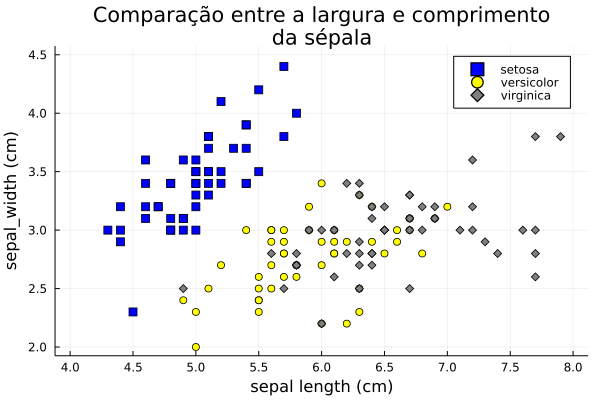

In [12]:
#Desenha um gráfico comparando as duas medidas
scatter(df_setosa.sepal_length, df_setosa.sepal_width, 
    m=:square, c=:blue, xlab="sepal length (cm)", ylab="sepal_width (cm)", label="setosa",
    xlim=[4, 8], xticks=4:0.5:8, ylim=[2, 4.5], yticks=2:0.5:4.5)
scatter!(df_versicolor.sepal_length, df_versicolor.sepal_width, m=:circle, c=:yellow, label="versicolor")
scatter!(df_virginica.sepal_length, df_virginica.sepal_width, m=:diamond, c=:grey, label="virginica")
title!("Comparação entre a largura e comprimento\nda sépala")

In [62]:
print("Comprimento da Pétala")
min(df.petal_length...), max(df.petal_length...)

Comprimento da Pétala

(1.0, 6.9)

In [63]:
print("Largura da Pétala")
min(df.petal_width...), max(df.petal_width...)

Largura da Pétala

(0.1, 2.5)

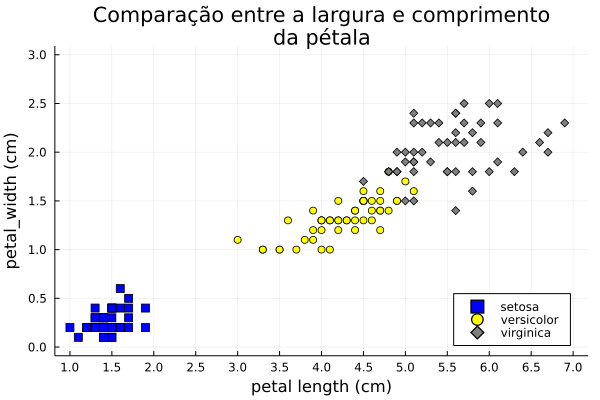

In [65]:
#Desenha um gráfico comparando as duas medidas
scatter(df_setosa.petal_length, df_setosa.petal_width, 
    m=:square, c=:blue, xlab="petal length (cm)", ylab="petal_width (cm)", label="setosa",
    xlim=[1, 7], xticks=1:0.5:7, ylim=[0, 3], yticks=0:0.5:3, legend=:bottomright)
scatter!(df_versicolor.petal_length, df_versicolor.petal_width, m=:circle, c=:yellow, label="versicolor")
scatter!(df_virginica.petal_length, df_virginica.petal_width, m=:diamond, c=:grey, label="virginica")
title!("Comparação entre a largura e comprimento\nda pétala")

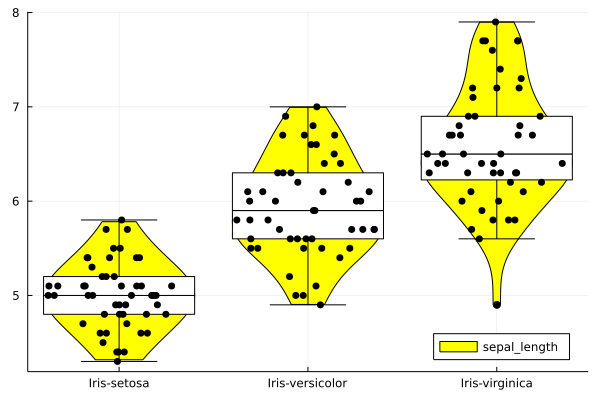

In [51]:
@df df violin(:class, :sepal_length, label="sepal_length", c=:yellow)
@df df boxplot!(:class, :sepal_length, label="", legend=:bottomright, c=:white)
@df df dotplot!(:class, :sepal_length, label="", c=:black)

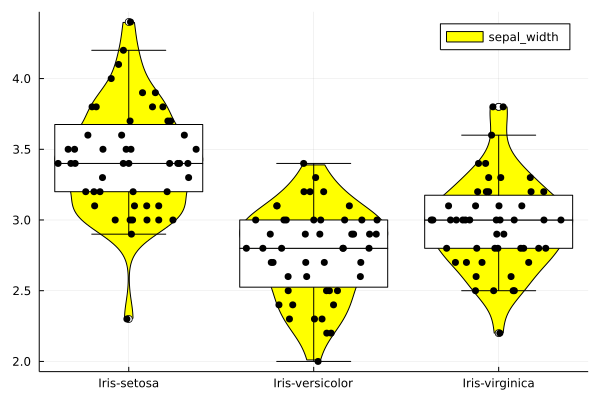

In [55]:
@df df violin(:class, :sepal_width, label="sepal_width", c=:yellow)
@df df boxplot!(:class, :sepal_width, label="", legend=:topright, c=:white)
@df df dotplot!(:class, :sepal_width, label="", c=:black)

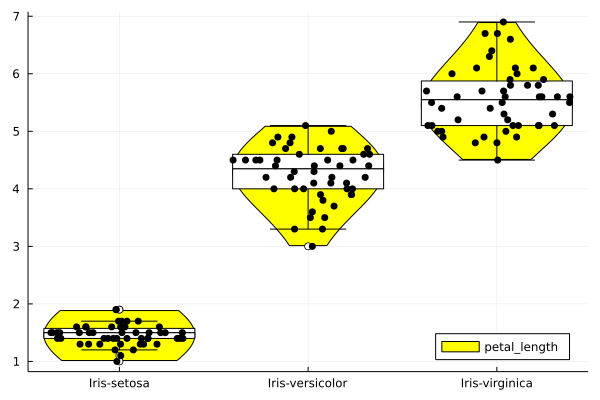

In [53]:
@df df violin(:class, :petal_length, label="petal_length", c=:yellow)
@df df boxplot!(:class, :petal_length, label="", legend=:bottomright, c=:white)
@df df dotplot!(:class, :petal_length, label="", c=:black)

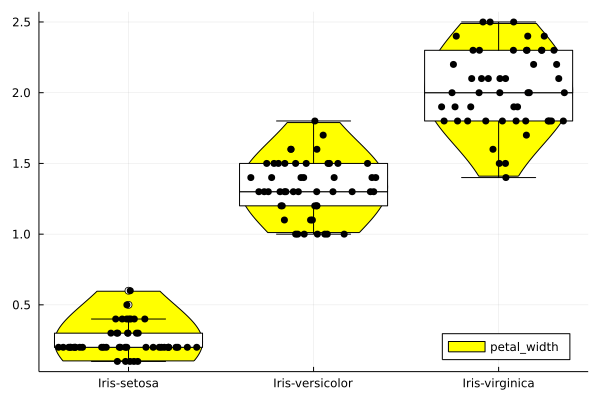

In [54]:
@df df violin(:class, :petal_width, label="petal_width", c=:yellow)
@df df boxplot!(:class, :petal_width, label="", legend=:bottomright, c=:white)
@df df dotplot!(:class, :petal_width, label="", c=:black)

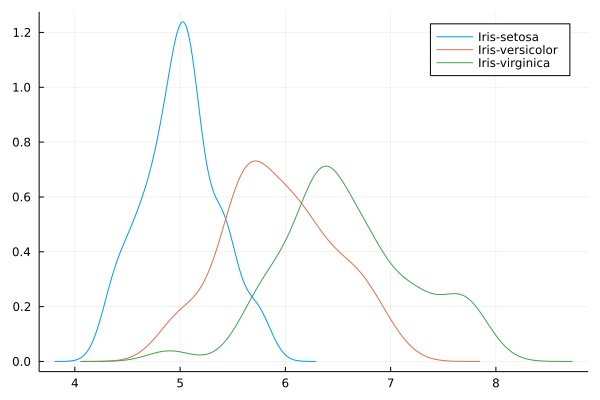

In [56]:
@df df density(:sepal_length, group = (:class), legend = :topright)

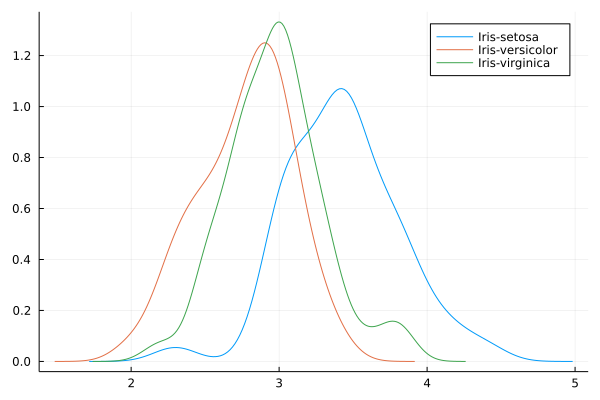

In [57]:
@df df density(:sepal_width, group = (:class), legend = :topright)

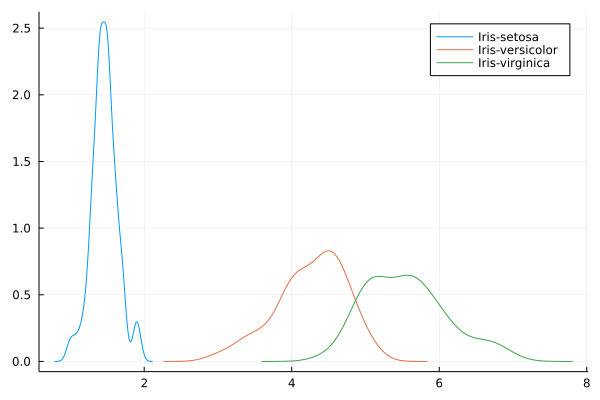

In [58]:
@df df density(:petal_length, group = (:class), legend = :topright)

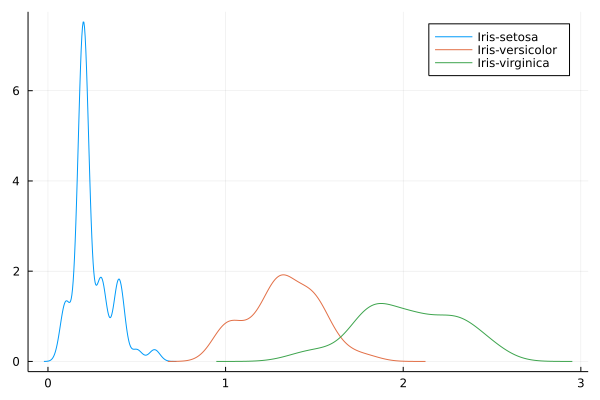

In [59]:
@df df density(:petal_width, group = (:class), legend = :topright)

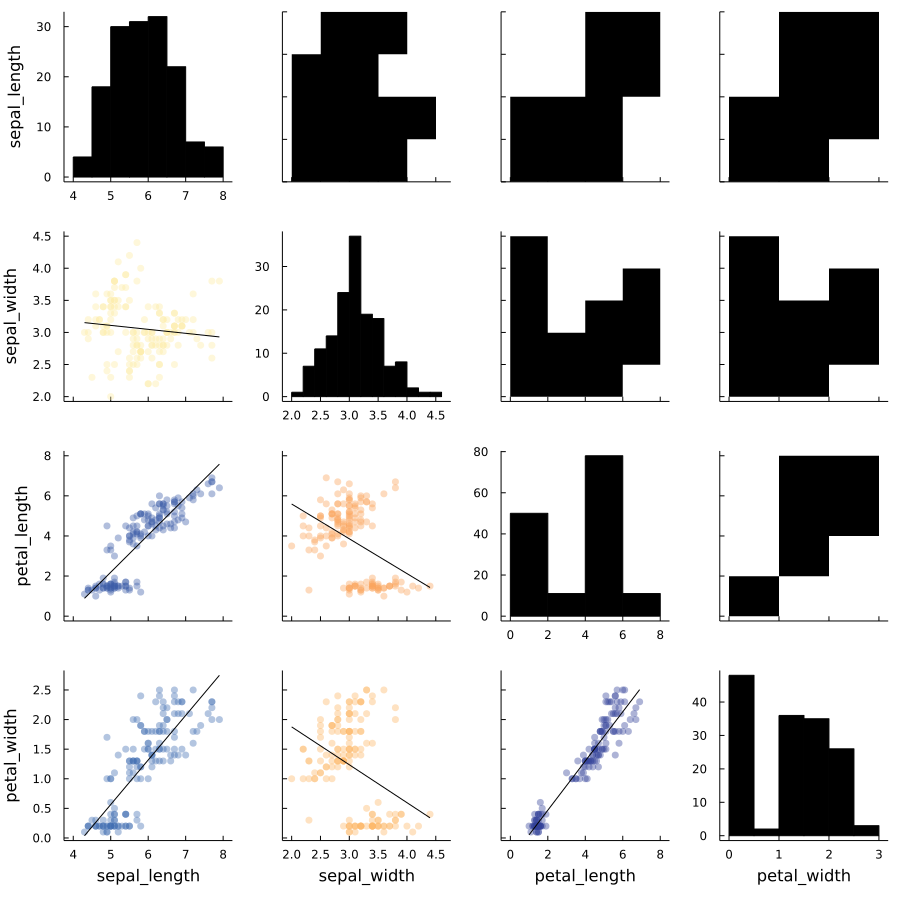

In [68]:
@df df corrplot(cols(1:4), grid = false, size=(900, 900))